In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler

import xgboost as xgb


In [9]:
df = pd.read_csv("creditcard.csv")

In [10]:
df.shape

(284807, 31)

In [11]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(1081)

In [15]:
df.drop_duplicates(inplace=True)

In [44]:
print('No Frauds', round(df['Class'].value_counts()[0] / len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1] / len(df) * 100, 2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Class
0    283253
1       473
Name: count, dtype: int64


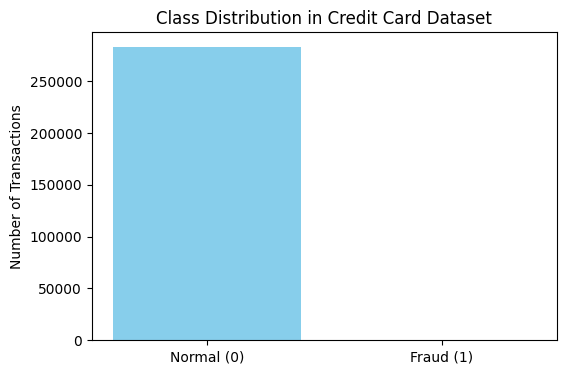

In [ ]:

# Count of each class
class_counts = df["Class"].value_counts()
print(class_counts)

# bar plot using Matplotlib
plt.figure(figsize=(6,4))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['skyblue', 'salmon'])
plt.xticks([0,1], ['Normal (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.title('Class Distribution in Credit Card Dataset')
plt.show()



C:\Users\Friedrich\AppData\Local\Temp\ipykernel_12832\1539629645.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby('Amount_bin')['Class'].mean().reset_index()


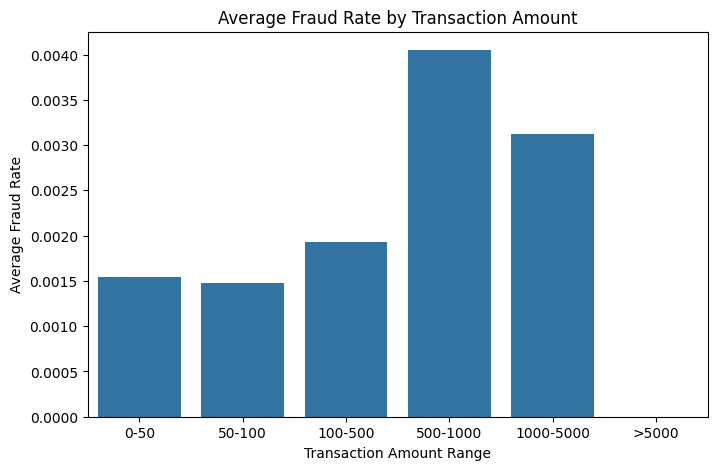

In [17]:
# Create bins for the Amount to make the chart readable
bins = [0, 50, 100, 500, 1000, 5000, df["Amount"].max()]
labels = ['0-50', '50-100', '100-500', '500-1000', '1000-5000', '>5000']
df['Amount_bin'] = pd.cut(df['Amount'], bins=bins, labels=labels, include_lowest=True)
# Calculate average fraud rate per bin
fraud_rate = df.groupby('Amount_bin')['Class'].mean().reset_index()

# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(x='Amount_bin', y='Class', data=fraud_rate)
plt.xlabel('Transaction Amount Range')
plt.ylabel('Average Fraud Rate')
plt.title('Average Fraud Rate by Transaction Amount')
plt.show()

### Do fraudulent transactions have higher average amounts than legitimate ones?

In [18]:
avg_amount_by_class=df.groupby("Class")["Amount"].mean().reset_index()
avg_amount_by_class

"""
yes fraudulent transactions have a higher amount than non-fraudulant transactions
"""

'\nyes fraudulent transactions have a higher amount than non-fraudulant transactions\n'

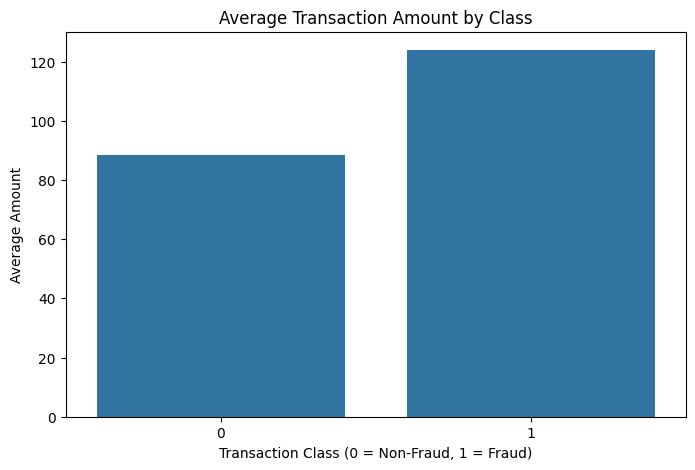

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart using Seaborn
plt.figure(figsize=(8,5))
sns.barplot(data=avg_amount_by_class, x="Class", y="Amount")
plt.title("Average Transaction Amount by Class")
plt.xlabel("Transaction Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Average Amount")
plt.show()


### Which PCA column has the highest correlation with fraud?

In [20]:
df.drop(columns=["Amount_bin"], inplace=True)
# Compute correlation of all features with Class
correlations = df.corr()["Class"].sort_values(ascending=False)

# Display correlations
print(correlations)

"""
V11 and V4 seem to have the highest correlation
"""

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64


'\nV11 and V4 seem to have the highest correlation\n'

In [21]:
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Random Forest is tree-based, so it splits data based on feature values, not distances.
Scaling is not necessary because the model is not sensitive to the magnitude of features.

## Undersampling

In [22]:
rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Before:", np.bincount(y_train))
print("After undersampling:", np.bincount(y_train_rus))

Before: [226602    378]
After undersampling: [378 378]


c:\Users\Friedrich\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\Friedrich\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
# Initialize the Random Forest classifier with basic settings
rf = RandomForestClassifier(
    n_estimators=300,      # Number of trees in the forest
    random_state=42        # Ensures reproducibility of results
)

# Train the model on the randomly undersampled training data
rf.fit(X_train_rus, y_train_rus)

# Predict class labels for the test set
rf_pred = rf.predict(X_test)

# Predict class probabilities for the positive class
rf_probs = rf.predict_proba(X_test)[:, 1]


In [ ]:
# Initialize the XGBoost classifier with chosen hyperparameters
xgb_model = xgb.XGBClassifier(
    n_estimators=300,           # Number of trees in the ensemble
    max_depth=5,                # Maximum depth of each tree
    learning_rate=0.05,         # Step size shrinkage to control learning
    subsample=0.8,              # Fraction of training data used per tree
    colsample_bytree=0.8,       # Fraction of features used per tree
    eval_metric="logloss",      # Metric used to evaluate performance during training
    random_state=42             # Ensures reproducibility
)

# Train the model on the randomly undersampled training data
xgb_model.fit(X_train_rus, y_train_rus)

# Predict class probabilities for the positive class
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Convert predicted probabilities to class labels using a threshold
xgb_pred = (xgb_probs > 0.5).astype(int)


In [25]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n===== {name} =====")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

In [26]:
evaluate_model("Random Forest (Undersampling)", y_test, rf_pred, rf_probs)
evaluate_model("XGBoost (Undersampling)", y_test, xgb_pred, xgb_probs)



===== Random Forest (Undersampling) =====
[[55825   826]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.09      0.87      0.17        95

    accuracy                           0.99     56746
   macro avg       0.55      0.93      0.58     56746
weighted avg       1.00      0.99      0.99     56746


===== XGBoost (Undersampling) =====
[[55299  1352]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746



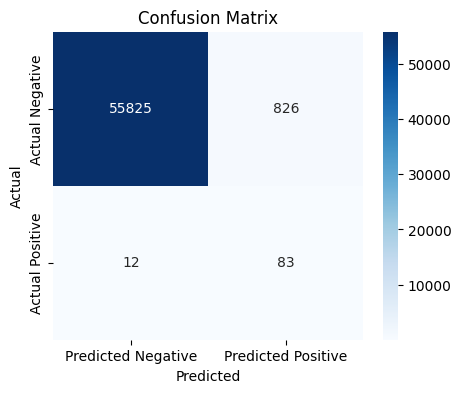

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plot as image
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")

# Save and show
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [27]:
"""
Row 1 (Actual 0):
    54,907 normal correctly predicted
    1,957 normal incorrectly predicted as fraud (false positives)

Row 2 (Actual 1):
    8 fraud missed (false negatives)
    90 fraud correctly detected (true positives)

What this means:

-> Recall for fraud = 90 / 98 = 0.92 -> good
-> Precision for fraud is very low (0.04) because many normal transactions were flagged as fraud.
"""

'\nRow 1 (Actual 0):\n    54,907 normal correctly predicted\n    1,957 normal incorrectly predicted as fraud (false positives)\n\nRow 2 (Actual 1):\n    8 fraud missed (false negatives)\n    90 fraud correctly detected (true positives)\n\nWhat this means:\n\n-> Recall for fraud = 90 / 98 = 0.92 -> good\n-> Precision for fraud is very low (0.04) because many normal transactions were flagged as fraud.\n'

## Oversampling

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
# scaler = StandardScaler()
# Fit the scaler on the training data and transform
# X_train_scaled = scaler.fit_transform(X_train)

# Apply SMOTE on the scaled features
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check class distribution before and after SMOTE
print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_sm))


c:\Users\Friedrich\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Before SMOTE: [226602    378]
After SMOTE: [226602 226602]


In [41]:
# Initialize the Random Forest classifier with chosen settings
rf = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    max_depth=25,             # Maximum depth of each tree
    max_features='sqrt',      # Number of features to consider at each split
    n_jobs=-1,                # Use all available CPU cores for training
    random_state=42           # Ensures reproducibility
)

# Fit the model on the oversampled training data
rf.fit(X_train_sm, y_train_sm)

# Predict class labels for the test set
rf_pred_sm = rf.predict(X_test)

# Predict class probabilities for the positive class
rf_probs_sm = rf.predict_proba(X_test)[:, 1]


In [42]:
# Initialize the XGBoost classifier with chosen hyperparameters
xgb_model_sm = xgb.XGBClassifier(
    n_estimators=300,           # Number of trees in the ensemble
    max_depth=25,               # Maximum depth of each tree
    learning_rate=0.05,         # Step size shrinkage to prevent overfitting
    subsample=0.8,              # Fraction of training data used per tree
    colsample_bytree=0.8,       # Fraction of features used per tree
    eval_metric="logloss",      # Evaluation metric for training
    random_state=42             # Ensures reproducibility
)

# Fit the model on the oversampled training data
xgb_model_sm.fit(X_train_sm, y_train_sm)

# Predict probabilities for the test set
xgb_probs_sm = xgb_model_sm.predict_proba(X_test)[:,1]

# Convert probabilities to class predictions based on a threshold
xgb_pred_sm = (xgb_probs_sm > 0.5).astype(int)


In [43]:
evaluate_model("Random Forest (SMOTE)", y_test, rf_pred_sm, rf_probs_sm)
evaluate_model("XGBoost (SMOTE)", y_test, xgb_pred_sm, xgb_probs_sm)



===== Random Forest (SMOTE) =====
[[56641    10]
 [   22    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.77      0.82        95

    accuracy                           1.00     56746
   macro avg       0.94      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746


===== XGBoost (SMOTE) =====
[[56642     9]
 [   19    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.80      0.84        95

    accuracy                           1.00     56746
   macro avg       0.95      0.90      0.92     56746
weighted avg       1.00      1.00      1.00     56746



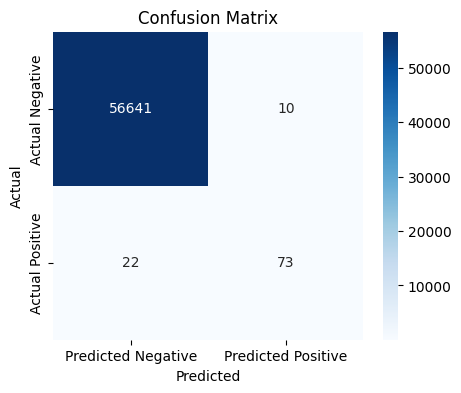

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_pred_sm)

# Plot as image
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")

# Save and show
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
"""
Row 1 (Actual 0 -> non-fraud):
56641    correctly predicted as normal (True Negatives, TN)
10       incorrectly flagged as fraud (False Positives, FP)

Row 2 (Actual 1 -> fraud):
22       fraud missed (False Negatives, FN)
73       correctly detected (True Positives, TP)

Precision 0.88 -> only 12% of alerts are false alarms.
    Much better than pure undersampling (which had precision ~0.04).
Recall 0.77 -> model detects most fraud cases.


XGBoost performs even better

"""

"\nRow 1 (Actual 0 -> non-fraud):\n56,844 correctly predicted as normal (True Negatives, TN)\n20 incorrectly flagged as fraud (False Positives, FP)\n\nRow 2 (Actual 1 -> fraud):\n18 fraud missed (False Negatives, FN)\n80 correctly detected (True Positives, TP)\n\nPrecision 0.80 -> only 20% of alerts are false alarms.\n    Much better than pure undersampling (which had precision ~0.04).\nRecall 0.82 -> model detects most fraud cases.\n\n\nXGBoost didn't improve -> unclear why\n\n"